In [ ]:
!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=61119914584824f30e411394ce58adc5a93a990d8464e79f1caee4eafbdfdb2b
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
"""Práctica de PySpark ML
Descripción
Dado el siguente dataset:

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

Cuyas variables representan:

age: edad del beneficiario principal
sex: género del contratante del seguro, femenino, masculino
bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, de los pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente entre 18,5 y 24,9.
children: número de hijos cubiertos por el seguro de salud / número de dependientes
smoker: si fuma o no
region: área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.
charges: costos médicos individuales facturados por el seguro de salud.


1) Primera parte (6 puntos)

Utilizando la API de pandas de PySpark

import pyspark.pandas as ps
Realiza un EDA del dataset anterior.



2) Segunda parte (4 puntos)

Luego conviertelós a un DataFrame de Spark normal, realiza las conversiones necesarias para poder hacer machine learning (StringIndexer, StandardScaler, VectorAssembler...) y aplica un modelo de regresión lineal usando pyspark.ml

La variable objetivo a predecir sería charges.



NOTA: En el caso de que hayáis sido incapaces de instalar adecuadamente Spark, podéis usar Spark en Google Colab poniendo lo siguiente en la primera celda:

!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" """

'Práctica de PySpark ML\nDescripción\nDado el siguente dataset:\n\nhttps://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv\n\nCuyas variables representan:\n\nage: edad del beneficiario principal\nsex: género del contratante del seguro, femenino, masculino\nbmi: índice de masa corporal, que proporciona una comprensión del cuerpo, de los pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente entre 18,5 y 24,9.\nchildren: número de hijos cubiertos por el seguro de salud / número de dependientes\nsmoker: si fuma o no\nregion: área de residencia del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.\ncharges: costos médicos individuales facturados por el seguro de salud.\n\n\n1) Primera parte (6 puntos)\n\nUtilizando la API de pandas de PySpark\n\nimport pyspark.pandas as ps\nRealiza un EDA del dataset anterior.\n\n\n\n2) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps

from pyspark.ml.feature import Imputer
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('insurance.csv').getOrCreate()

In [ ]:
import requests
from pyspark.sql import SparkSession

#iniciamos una sesion  de Spark

spark = SparkSession.builder.appName("insurance Dataset").getOrCreate()

#descargamos el dataset desde la URL
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

response = requests.get(url)

#guardamos el archivo temporalmente en  colab
csv_path = "/content/insurance.csv"
with open(csv_path, "wb") as file:
    file.write(response.content)

#leer con Spark el csv

df = spark.read.csv(csv_path, header=True, inferSchema=True)


In [ ]:
df.show(5)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows



In [ ]:
df.describe().show() #estadisticas descriptivas del dataset,resumen estadístico

+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  NULL|30.663396860986538|  1.0949177877429|  NULL|     NULL|13270.422265141257|
| stddev|14.049960379216147|  NULL| 6.098186911679012|1.205492739781914|  NULL|     NULL|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    max|                64|  male|             53.13|                5|   yes|southwest|       63770.42801|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+



In [ ]:
df.printSchema() # mostrar tipos de datos por columna

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [ ]:
sex_distribution=df.groupby("sex").count() #ver y contar la distribucion de la variable sex
#mostrar la distribución
sex_distribution.show()


+------+-----+
|   sex|count|
+------+-----+
|female|  662|
|  male|  676|
+------+-----+



In [ ]:
sex_distribution=df.groupby("smoker").count() #ver y contar la distribucion de la variable smoker
#mostrar la distribución
sex_distribution.show()

+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



In [ ]:
sex_distribution=df.groupby("region").count() #ver y contar la distribucion de la variable smoker
#mostrar la distribución
sex_distribution.show()

+---------+-----+
|   region|count|
+---------+-----+
|northwest|  325|
|southeast|  364|
|northeast|  324|
|southwest|  325|
+---------+-----+



In [ ]:
from pyspark.sql import functions as F
#reemplazo 'male' por 1 y female por 0 en la columna sex

df = df.withColumn("sex",F.when(F.col("sex") == "male", 1).otherwise(0))

#mostrar las filas para confirmar cambios

df.show(20)

+---+---+------+--------+------+---------+-----------+
|age|sex|   bmi|children|smoker|   region|    charges|
+---+---+------+--------+------+---------+-----------+
| 19|  0|  27.9|       0|   yes|southwest|  16884.924|
| 18|  1| 33.77|       1|    no|southeast|  1725.5523|
| 28|  1|  33.0|       3|    no|southeast|   4449.462|
| 33|  1|22.705|       0|    no|northwest|21984.47061|
| 32|  1| 28.88|       0|    no|northwest|  3866.8552|
| 31|  0| 25.74|       0|    no|southeast|  3756.6216|
| 46|  0| 33.44|       1|    no|southeast|  8240.5896|
| 37|  0| 27.74|       3|    no|northwest|  7281.5056|
| 37|  1| 29.83|       2|    no|northeast|  6406.4107|
| 60|  0| 25.84|       0|    no|northwest|28923.13692|
| 25|  1| 26.22|       0|    no|northeast|  2721.3208|
| 62|  0| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  1|  34.4|       0|    no|southwest|   1826.843|
| 56|  0| 39.82|       0|    no|southeast| 11090.7178|
| 27|  1| 42.13|       0|   yes|southeast| 39611.7577|
| 19|  1| 

In [ ]:
from pyspark.sql import functions as F
#reemplazamos  northwest por 1 y southwest por 0
df = df.withColumn("region",
                   F.when(F.col("region") == "northwest", 1)
                         .when(F.col("region") == "southwest", 0)
                         .otherwise(F.col("region")))
#mostrar para confirmar cambios

df.show(20)

+---+---+------+--------+------+---------+-----------+
|age|sex|   bmi|children|smoker|   region|    charges|
+---+---+------+--------+------+---------+-----------+
| 19|  0|  27.9|       0|   yes|        0|  16884.924|
| 18|  1| 33.77|       1|    no|southeast|  1725.5523|
| 28|  1|  33.0|       3|    no|southeast|   4449.462|
| 33|  1|22.705|       0|    no|        1|21984.47061|
| 32|  1| 28.88|       0|    no|        1|  3866.8552|
| 31|  0| 25.74|       0|    no|southeast|  3756.6216|
| 46|  0| 33.44|       1|    no|southeast|  8240.5896|
| 37|  0| 27.74|       3|    no|        1|  7281.5056|
| 37|  1| 29.83|       2|    no|northeast|  6406.4107|
| 60|  0| 25.84|       0|    no|        1|28923.13692|
| 25|  1| 26.22|       0|    no|northeast|  2721.3208|
| 62|  0| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  1|  34.4|       0|    no|        0|   1826.843|
| 56|  0| 39.82|       0|    no|southeast| 11090.7178|
| 27|  1| 42.13|       0|   yes|southeast| 39611.7577|
| 19|  1| 

In [ ]:
#reemplazamos northeast por 2 y southeast por 4
df = df.withColumn("region",
                   F.when(F.col("region") == "northeast", 2)
                         .when(F.col("region") == "southeast", 4)
                         .otherwise(F.col("region")))
#mostrar para confirmar cambios

df.show(5)

+---+---+------+--------+------+------+-----------+
|age|sex|   bmi|children|smoker|region|    charges|
+---+---+------+--------+------+------+-----------+
| 19|  0|  27.9|       0|   yes|     0|  16884.924|
| 18|  1| 33.77|       1|    no|     4|  1725.5523|
| 28|  1|  33.0|       3|    no|     4|   4449.462|
| 33|  1|22.705|       0|    no|     1|21984.47061|
| 32|  1| 28.88|       0|    no|     1|  3866.8552|
+---+---+------+--------+------+------+-----------+
only showing top 5 rows



In [ ]:
#hacemos lo mismo con la columna smoker para tener todo el dataset  numeros

#reemplazamos northeast por 2 y southeast por 4
df = df.withColumn("smoker",
                   F.when(F.col("smoker") == "yes", 1)
                         .when(F.col("smoker") == "no", 0)
                         .otherwise(F.col("smoker")))
#mostrar para confirmar cambios

df.show(5)

+---+---+------+--------+------+------+-----------+
|age|sex|   bmi|children|smoker|region|    charges|
+---+---+------+--------+------+------+-----------+
| 19|  0|  27.9|       0|     1|     0|  16884.924|
| 18|  1| 33.77|       1|     0|     4|  1725.5523|
| 28|  1|  33.0|       3|     0|     4|   4449.462|
| 33|  1|22.705|       0|     0|     1|21984.47061|
| 32|  1| 28.88|       0|     0|     1|  3866.8552|
+---+---+------+--------+------+------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.types import IntegerType, DoubleType
import numpy as np
import pandas as pd

#iniciamos la sesion de Spark
spark = SparkSession.builder.appName("Correlation Matrix").getOrCreate()

#leemos el archivo data set desde la URL

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
csv_path = "/content/insurance.csv"
!curl -o $csv_path $url

#leemos el archivo csv con Spark

df = spark.read.csv(csv_path, header =True, inferSchema=True)

#remplazamos los valores de 'sex' y smoker' por numeros
from pyspark.sql.functions import when, col

df = df.withColumn("sex", when (col("sex") == "male", 1).otherwise(0))
df = df.withColumn("smoker", when (col("smoker") == "yes", 1).otherwise(0))

# Ahora verificammos las columnas numericas
numeric_cols = [col for col in df.columns if isinstance(df.schema[col].dataType, (IntegerType, DoubleType))]

#Ahora usamos VectorAssembler para combinar las columnas numericas en un unico vector

assembler = VectorAssembler(inputCols=numeric_cols, outputCol = "features")
df_vec = assembler.transform(df)

#mostramos el data frame con la columna Features
df_vec.select("features").show(6, truncate=False)

#calculamos la matriz de correlacion

correlation_matrix = Correlation.corr(df_vec, "features").head()[0]

#concertir ahora la matriz en un array de numpy

corr_array = correlation_matrix.toArray()
# convertimos a un data frame de Pandas para una mejor visualización
corr_df = pd.DataFrame(corr_array,columns=numeric_cols, index =numeric_cols)

#mostramos la matriz con
print(corr_df)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54288  100 54288    0     0   185k      0 --:--:-- --:--:-- --:--:--  186k
+-------------------------------------+
|features                             |
+-------------------------------------+
|[19.0,0.0,27.9,0.0,1.0,16884.924]    |
|[18.0,1.0,33.77,1.0,0.0,1725.5523]   |
|[28.0,1.0,33.0,3.0,0.0,4449.462]     |
|[33.0,1.0,22.705,0.0,0.0,21984.47061]|
|[32.0,1.0,28.88,0.0,0.0,3866.8552]   |
|[31.0,0.0,25.74,0.0,0.0,3756.6216]   |
+-------------------------------------+
only showing top 6 rows

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.

La matriz de correlación muestra como cada par de variables estan correlacionadas linealmente vemos que age' y charges' estan con una correlación moderada positiva lo que da informacion sobre que las personas mayores tienden a tener mayores cargos médicos.

Vemos una corrlacion debil moderada positiva  entre el indice de masa corporal bmi' y los cargos medicos charges' lo que sugiere que a mayor bmi' mayores cargos médicos.

Tambien vemos una correlación alta positiva  entre el estado del fumador y los cargos médicos lo que indica que lo fumadores tienden a tener cargos medicos significativamente más altos.

Las demas varibles tienen poca correlacion entre ellas o muy debil correlacion.

Para realizar visualizaciones graficas en pysparc debemos convertir el dataframe a pandas por que en spark no hay compatibilidad con librerias graficas necesariias como matplotlib o seaborn


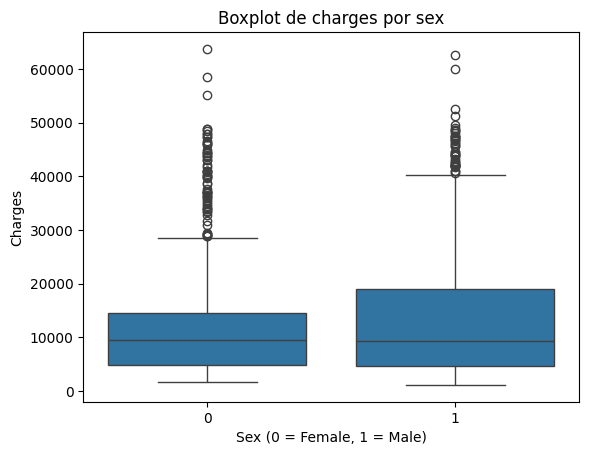

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# convertir el data frame de pyspark a pandas para graficar

pandas_df =  df.select("sex", "charges").toPandas()

# creamos el boxplot
sns.boxplot(x="sex", y="charges", data=pandas_df)
plt.title("Boxplot de charges por sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Charges")
plt.show()

interpretación boxplot de charges por sex:

la mediana difiere entre categorías lo que sugiere que el género puede influir en los costes meédicos

el rango intercuartílico

loos bigotes se  extienden desde la cajas hasta hasta el valor ma lejano que no se considera un outlier esto muestra la dispersión  de los daros fuera del rango intercuartílico.

los outliers, fuera de rango despues de los bigotes indican que hay casos especiales  que merecen un analisis mas profundo

El boxplot de charges por sex muestra la mediana que es similar entre hombre y mujeres pero los outliers indican que algunos hombres  tienen costes mas áltos que la mayoria  estos outliers podrian ser asociados con otros factores como el IMC y el hecho de ser fumador.

In [ ]:
df.head(10)

[Row(age=19, sex=0, bmi=27.9, children=0, smoker=1, region='southwest', charges=16884.924),
 Row(age=18, sex=1, bmi=33.77, children=1, smoker=0, region='southeast', charges=1725.5523),
 Row(age=28, sex=1, bmi=33.0, children=3, smoker=0, region='southeast', charges=4449.462),
 Row(age=33, sex=1, bmi=22.705, children=0, smoker=0, region='northwest', charges=21984.47061),
 Row(age=32, sex=1, bmi=28.88, children=0, smoker=0, region='northwest', charges=3866.8552),
 Row(age=31, sex=0, bmi=25.74, children=0, smoker=0, region='southeast', charges=3756.6216),
 Row(age=46, sex=0, bmi=33.44, children=1, smoker=0, region='southeast', charges=8240.5896),
 Row(age=37, sex=0, bmi=27.74, children=3, smoker=0, region='northwest', charges=7281.5056),
 Row(age=37, sex=1, bmi=29.83, children=2, smoker=0, region='northeast', charges=6406.4107),
 Row(age=60, sex=0, bmi=25.84, children=0, smoker=0, region='northwest', charges=28923.13692)]

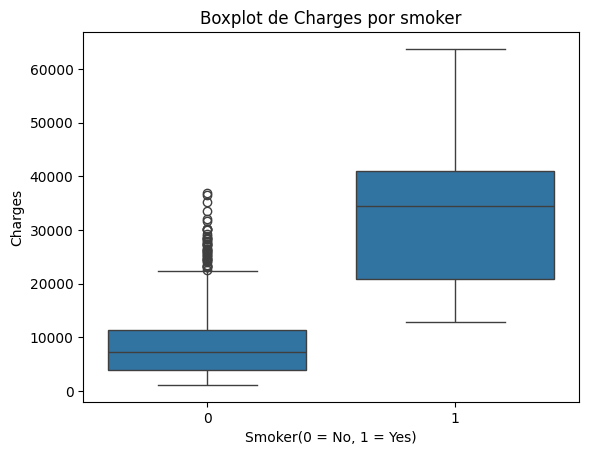

In [ ]:
#convertir el data frame de pyspark a pandas
pandas_df = df .select("smoker","charges").toPandas()

#crearmos el boxplot
sns.boxplot(x= "smoker", y="charges", data=pandas_df)
plt.title("Boxplot de Charges por smoker")
plt.xlabel("Smoker(0 = No, 1 = Yes)")
plt.ylabel("Charges")
plt.show()





Ahora creamos el Violin Plot por Charges



In [ ]:
df.head(5)

[Row(age=19, sex=0, bmi=27.9, children=0, smoker=1, region='southwest', charges=16884.924),
 Row(age=18, sex=1, bmi=33.77, children=1, smoker=0, region='southeast', charges=1725.5523),
 Row(age=28, sex=1, bmi=33.0, children=3, smoker=0, region='southeast', charges=4449.462),
 Row(age=33, sex=1, bmi=22.705, children=0, smoker=0, region='northwest', charges=21984.47061),
 Row(age=32, sex=1, bmi=28.88, children=0, smoker=0, region='northwest', charges=3866.8552)]

In [ ]:
#convertimos el data frame a pandas
pandas_df = df.select("sex", "charges").toPandas()

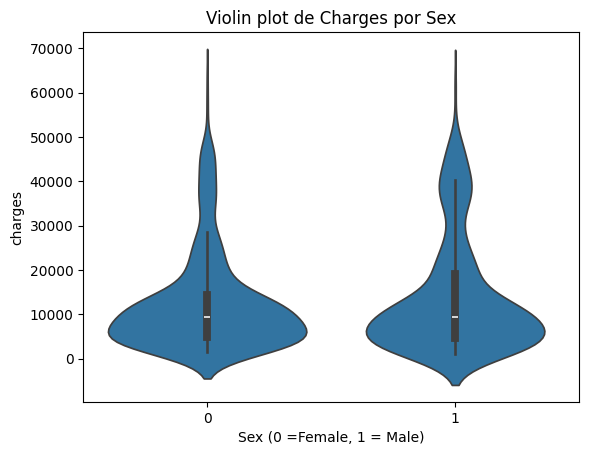

In [ ]:
#crear el violin plor

sns.violinplot(x="sex", y="charges", data=pandas_df)
plt.title("Violin plot de Charges por Sex")
plt.xlabel("Sex (0 =Female, 1 = Male)")
plt.ylabel("charges")
plt.show()


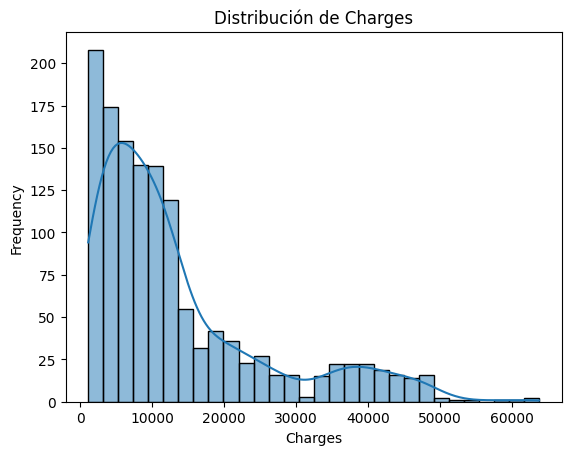

In [ ]:
#histograma con linea de densidad(KDE plot)

sns.histplot(pandas_df["charges"],kde=True)
plt.title("Distribución de Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()



Descripción del grafico:

El histograma divide los valores de charges' en rangos y cuenta cuantas osbservaciones cae en cada bin', el KDEplot suabiza la distribución usando funcines de densidad para mostrar una curva continua que muestra la probalilidad de observar diferentes valores de charges', la distribución es sesgada a la izquierda


El pico o picos indica  las modas los valores de charges mas comunes la mayor parte de datos está en valores bajos los que sugiere que la mayoria de los ususrios tienen costes medicos relativamente bajos.

El scatter plot  o  grafico de dispersión numérica en un EDA se usa para visualizzr la reelacion entre 2 variables numéricas en este caso Charges y BMI en este caso.


En contexto charges, El eje X represienta el bmi, y el eje Y la variable objetivo Charges.

pdemos decir que la relación lineal es baja  ya que la mayoria de los puntos tienen un patron de dispersión no lineal a la vista  de la dispersion de las variables en este caso.La mayoría de los datos por densidad se centran en la parte inferior central.

Hay pocos outliers que disten del patron de dispersión general

 La relación general de distribución es no lineal en general y prodría se r necescesario considerar modelos no lineales o transformación de variables por lo que podemos decir que la relación entre charges y BMI no son considerables al ser de relación lineal baja según muestra la grafica.



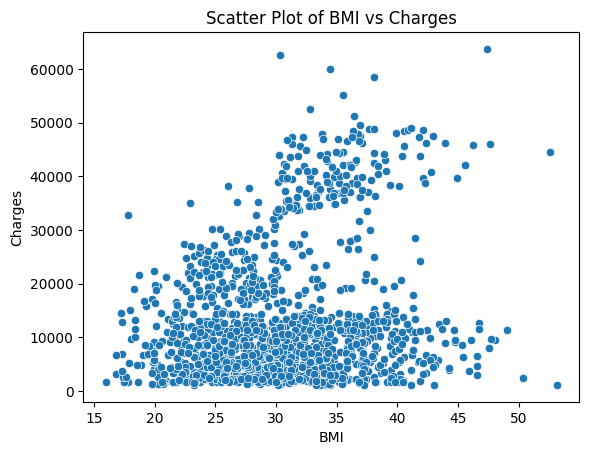

In [ ]:
# Convertir el DataFrame de PySpark a Pandas con las columnas necesarias
pandas_df = df.select("bmi", "charges").toPandas()

# Crear el scatter plot
sns.scatterplot(x="bmi", y="charges", data=pandas_df)
plt.title("Scatter Plot of BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


In [ ]:
#2) Segunda parte (4 puntos)

#Luego conviertelós a un DataFrame de Spark normal, realiza las conversiones necesarias para poder hacer machine learning (StringIndexer, StandardScaler, VectorAssembler...) y aplica un modelo de regresión lineal usando pyspark.ml

#La variable objetivo a predecir sería charges.


Para realizar la segunda parte del ejercicio, donde se aplica un modelo de regresión lineal usando PySpark, se deben seguir los siguientes pasos detallados:

1. Convertir el DataFrame a Formato Normal de Spark
Si aún no has convertido el DataFrame en un formato numérico apto para el modelado, debes hacerlo. A continuación, convertirás todas las variables categóricas a numéricas y normalizarás los datos para el modelo de regresión.

2. Convertir Variables Categóricas usando StringIndexer
Primero, convierte las variables categóricas a numéricas utilizando StringIndexer para que puedan ser usadas en el modelo de machine learning.


In [ ]:
from pyspark.ml.feature import StringIndexer

# Convertir las variables categóricas a numéricas
indexer_sex = StringIndexer(inputCol="sex", outputCol="sex_index")
indexer_smoker = StringIndexer(inputCol="smoker", outputCol="smoker_index")
indexer_region = StringIndexer(inputCol="region", outputCol="region_index")

# Aplicar los indexers
df = indexer_sex.fit(df).transform(df)
df = indexer_smoker.fit(df).transform(df)
df = indexer_region.fit(df).transform(df)


 3- Vectorizar las caracteristicas usando Vectorassembler luego es necesario combinar todas las caractreristicas en  un solo vector de caracteristicas aue sera usado por el modelo de regresion.

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Seleccionar las columnas que se utilizarán en el modelo
feature_columns = ["age", "sex_index", "bmi", "children", "smoker_index", "region_index"]

# Crear el ensamblador de características
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transformar el DataFrame
df = assembler.transform(df)


4- Estandarizar las caracteristicas usando StandardScaler asegura que todas tengan una escala similar.

In [ ]:
from pyspark.ml.feature import StandardScaler

# Estandarizar las características
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)


5-Dividimos los datos en conjuntos de entrenamineto y validación.

In [ ]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)


6- usamos ahora el modelo de regresión lineal y es posible entonces entrenar el modelo de regresion lineal usando PySpark.

In [ ]:
from pyspark.ml.regression import LinearRegression

# Inicializar el modelo de regresión lineal
lr = LinearRegression(featuresCol="scaled_features", labelCol="charges")

# Entrenar el modelo con el conjunto de datos de entrenamiento
lr_model = lr.fit(train_df)

# Realizar predicciones en el conjunto de prueba
predictions = lr_model.transform(test_df)


7- Evsluamos el modelo despues de entrenarlo con métricas como RMSE y R2 etc.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluar el modelo usando RMSE y R2
evaluator_rmse = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="rmse")
rmse = evaluator_rmse.evaluate(predictions)

evaluator_r2 = RegressionEvaluator(labelCol="charges", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2: {r2}")


Root Mean Squared Error (RMSE): 5675.906217393326
R2: 0.7944072812622284


8- intempretación de resultados y conclusión
RMSE indica el promedio de la magnitud de los errores de predicción al ser bajo indica precisión en el modelo.

R2 indica que tan bien se ajustan los datos al modelo si es cercano a 1, el modelo explica bien  la variabilidad de los datos.
finalizano así el modelo que se podría mejorar con otras adaptaciones  y damos por hecho que el modelo funciona bien aunque se podria mejorar.

Conclusiones del EDA:

Impacto del Tabaquismo en los Costos Médicos: El violin plot muestra claramente que los fumadores tienden a tener costos médicos significativamente más altos que los no fumadores. Esto sugiere que el estado de fumador es un predictor fuerte y relevante de los costos médicos.
Variabilidad: La mayor dispersión de charges entre los fumadores también sugiere que el tabaquismo no solo aumenta los costos, sino que también introduce una mayor variabilidad en los mismos. Esto podría estar relacionado con la aparición de enfermedades graves o crónicas asociadas con el tabaquismo, que incrementan los costos médicos.
Implicaciones para el Modelado:

Dado que el estado de fumador tiene un impacto tan claro en los costos médicos, esta variable debe ser tenida en cuenta de manera destacada en cualquier modelo predictivo que intente estimar charges. Además, la amplia variabilidad entre los fumadores podría sugerir la necesidad de modelar interacciones o explorar más a fondo cómo el tabaquismo, combinado con otras variables, afecta los costos médicos.
Visualización y Comunicación
Este tipo de visualización no solo ayuda a entender la relación entre el hábito de fumar y los costos médicos, sino que también facilita la comunicación de estos hallazgos a otros, como partes interesadas o miembros del equipo que no estén tan familiarizados con los análisis estadísticos.
